# House Price Prediction
                       - Amardeep
                       - UG at IIT Kharagpur

Dataset: https://www.kaggle.com/code/yuvraj5857/bengaluru-house-price-data

##### Description

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

#### Data Description
* area_type: Description of the area
* availability: When it can be possessed or when it is ready
* location: Where it is located in Bengaluru
* size: BHK or Bedrooms
* society: To which society it belongs
* total_sqft: Size of the property in sq.ft
* bath: No. of Bathrooms
* balcony:  No. of the Balcony
* price: Value of the property in lakhs (Indian Rupee - ₹)

#### Some Constraints
* cost of mis-classification is high.
 

##### Importing the Libraries

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (13,7)
import seaborn as sns

In [73]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [74]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Exploratory Data Analysis(EDA)

###### Checking shape of the dataset

In [75]:
data.shape

(13320, 9)

In [76]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


###### Data Description

In [78]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


###### Missing Values

In [79]:
#### list of features with missing values

features_with_na = [features for features in data.columns if data[features].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 5), '% missing values');

size 0.0012 % missing values
society 0.41306 % missing values
bath 0.00548 % missing values
balcony 0.04572 % missing values


---

We can see that society has quite significant missing value.
Anyways we will find the relation between the missing values and the Price

We will plot and look into the relation
* we make a variable which indicates **'1' where data is missing** and '0' otherwise
* we calculate the median **price** where this info is missing or present

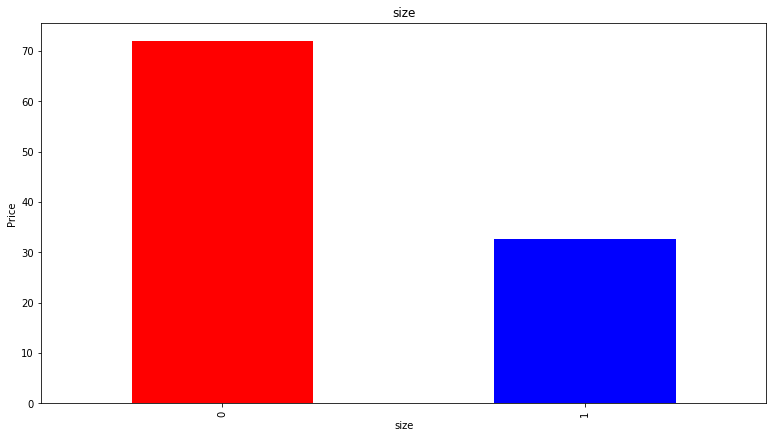

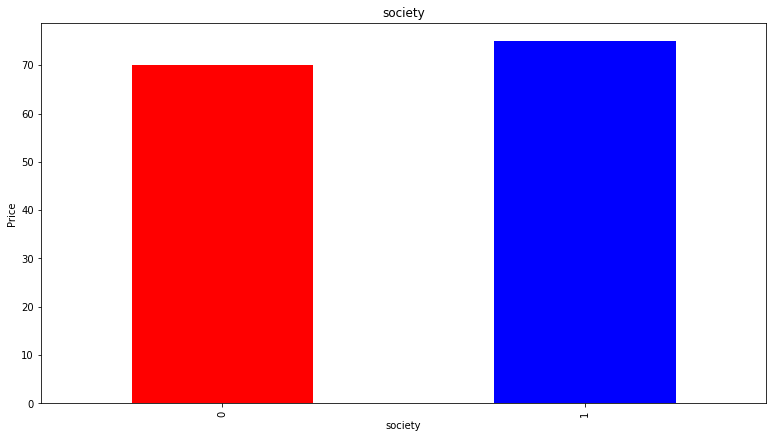

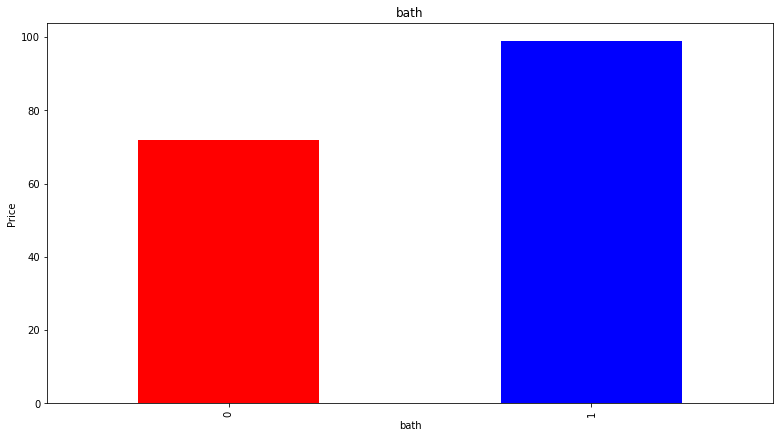

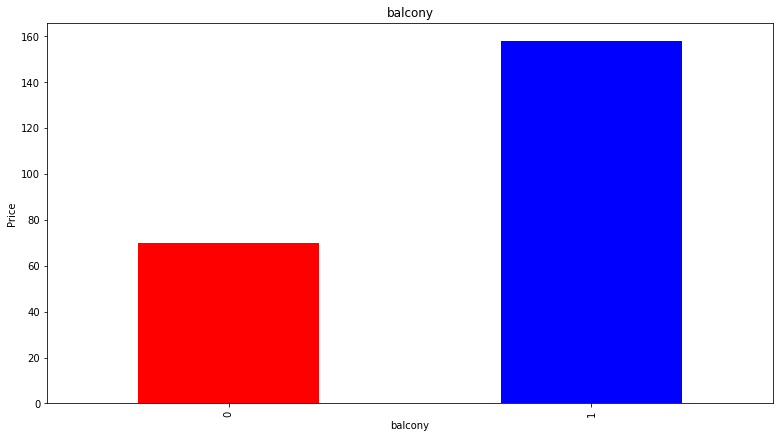

In [80]:
for feature in features_with_na:
    dataN = data.copy()
    dataN[feature] = np.where(dataN[feature].isnull(), 1, 0)
    
    dataN.groupby(feature)['price'].median().plot.bar(color=['r', 'b'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

we can see that there is a relation between null values and the price so we have to handle them.

---

###### Columns with Numerical Values

In [81]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
data[numerical_features].head()

Number of numerical variables:  3


,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


###### Types of Numerical Data
1. Discrete
2. Continous



**1.Discrete Data**

In [82]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
## if length of the unique dataset is less than 25

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [83]:
discrete_feature

['bath', 'balcony']

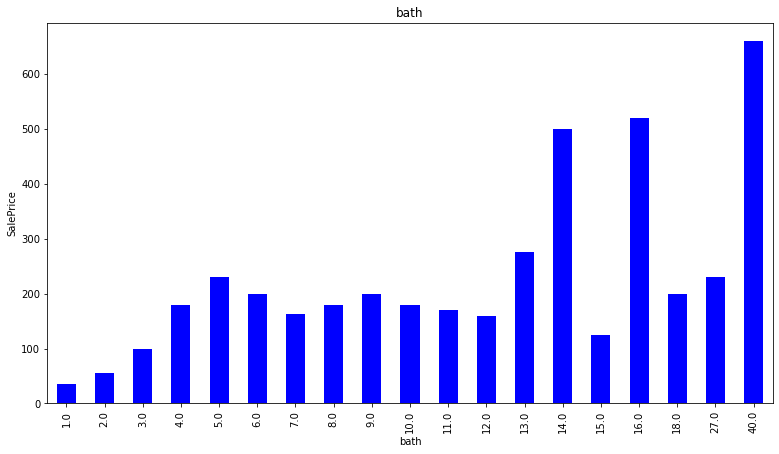

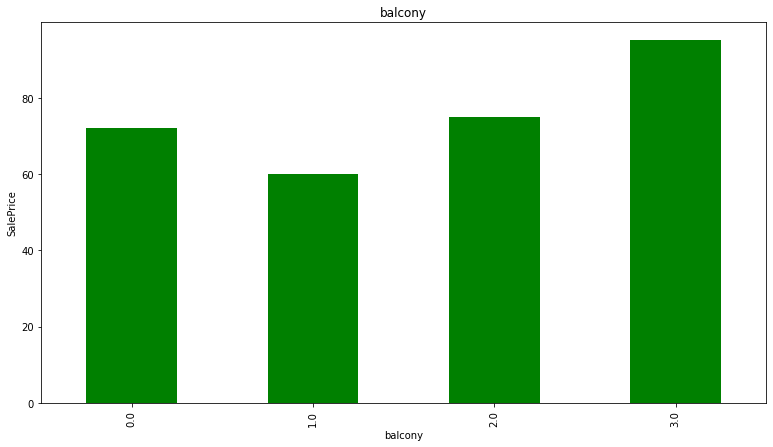

In [84]:
## relation between these discrete variables and the salesprice
colors = "bgrcmykbgyrkmrkbb"
color_index = 0
for feature in discrete_feature:
    dataN=data.copy()
    dataN.groupby(feature)['price'].median().plot.bar(color=colors[color_index])
    color_index += 1
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**2. Continous Data**

In [85]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [86]:
continuous_feature

['price']

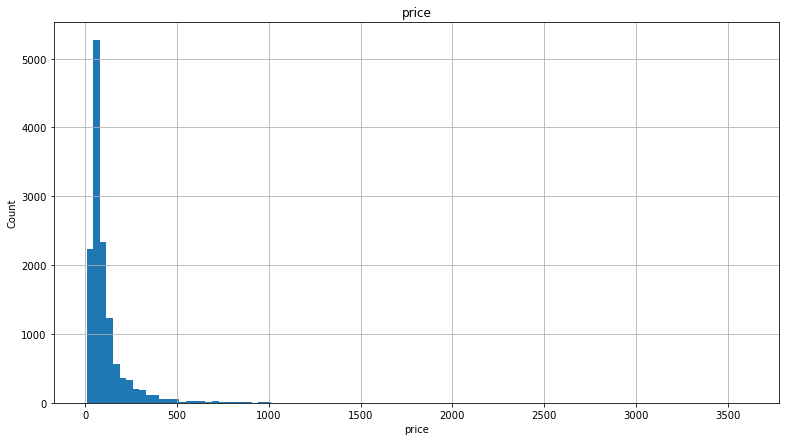

In [87]:
for feature in continuous_feature:
    dataN=data.copy()
    dataN[feature].hist(bins=100)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We can see how the price varies
* we have more number of houses for lower price
* the count is very low for high priced houses

###### Performing Group by operation on Area Type

In [88]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [89]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

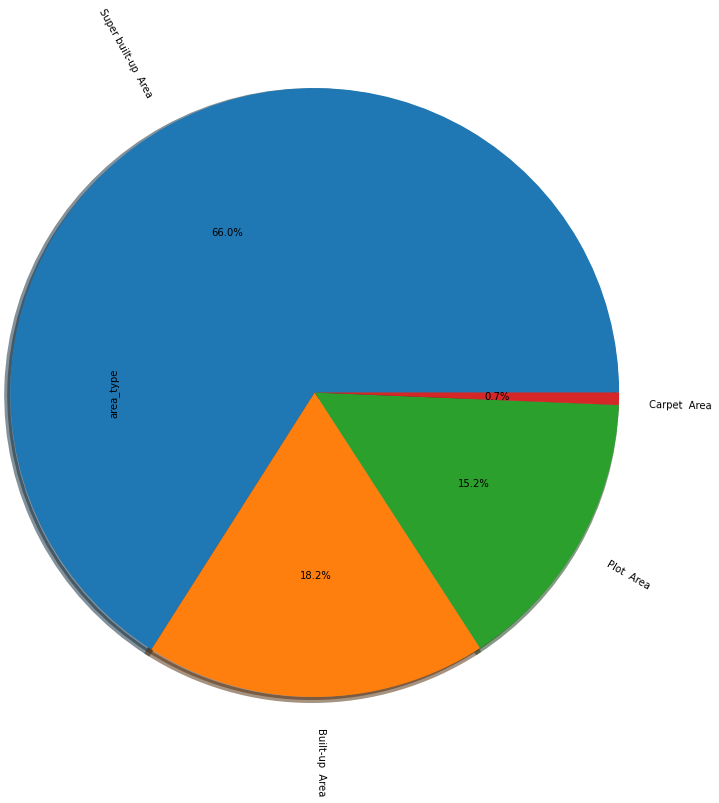

In [90]:
(data["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

###### Bathroom feature

In [91]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<AxesSubplot:>

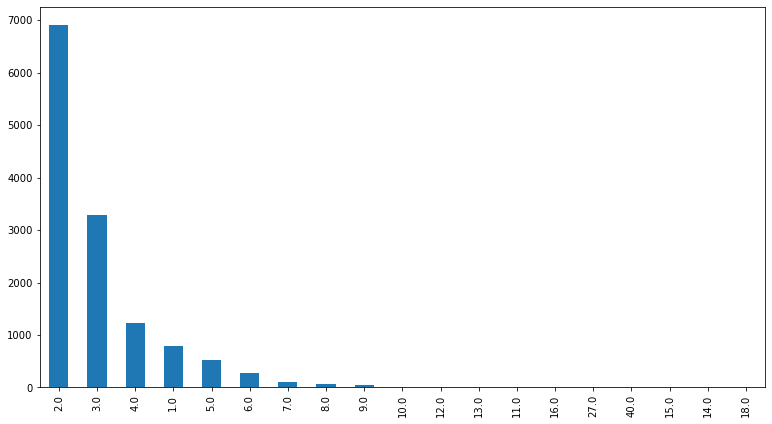

In [92]:
data.bath.value_counts().plot(kind='bar')

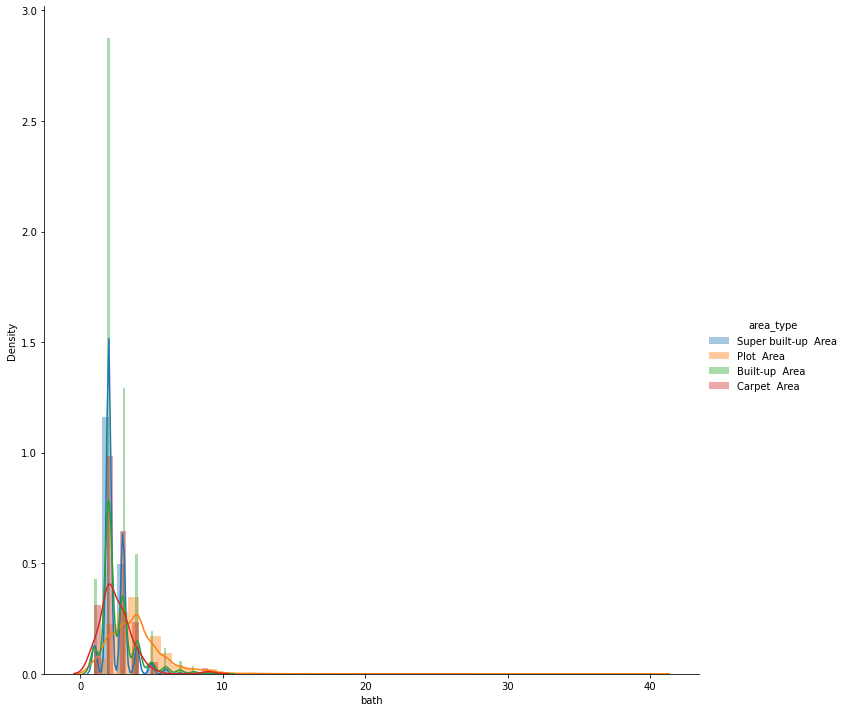

In [93]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(data, hue='area_type', height=10).map(sns.distplot, 'bath').add_legend()
plt.show()

###### Balcony Feature

In [94]:
data['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

<AxesSubplot:>

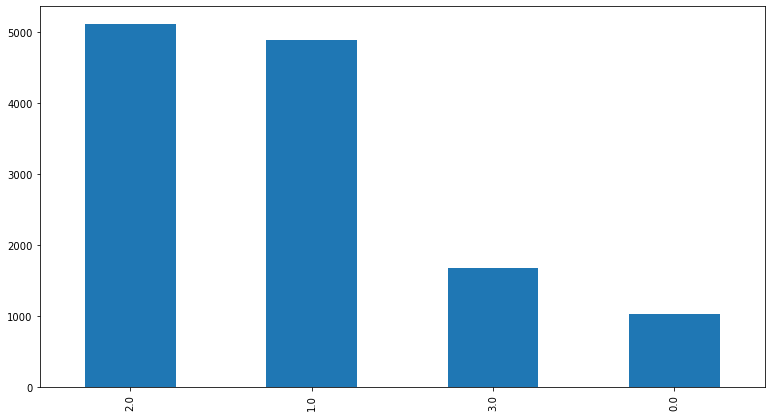

In [95]:
data.balcony.value_counts().plot(kind='bar')

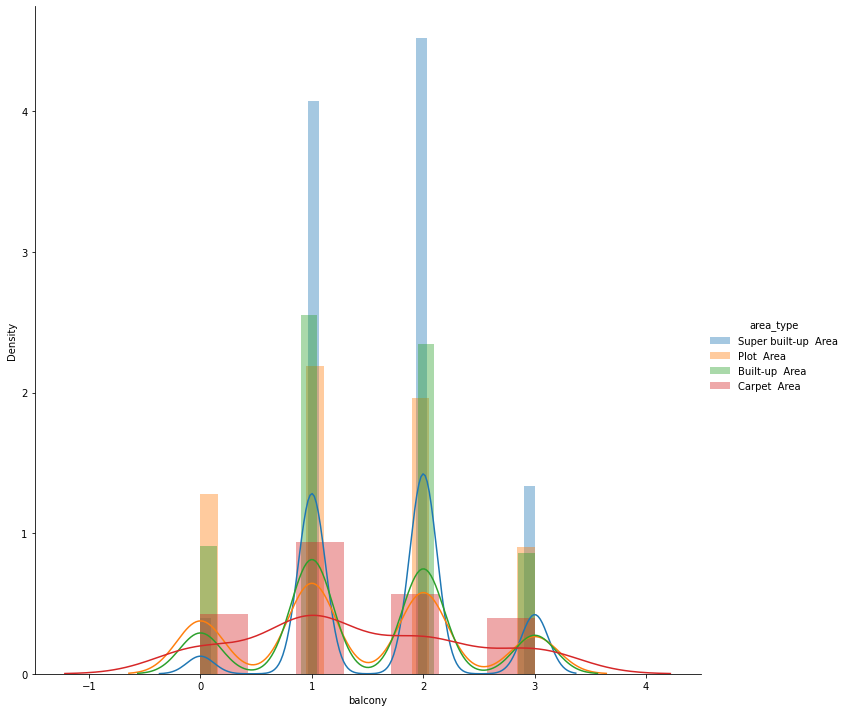

In [96]:
sns.FacetGrid(data, hue='area_type', height=10).map(sns.distplot, 'balcony').add_legend()
plt.show()

###### Dropping less important features

In [97]:
data = data.drop(['society', 'availability','balcony' ], axis='columns')

In [98]:
data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


###### Handling the Null values

The features which have null values are 
* size
* bath
* balcony
* society

we have dropped balcony and society so we have to handle the rest two cases

In [99]:
## for bath
data['bath'] = data['bath'].fillna(data['bath'].median())
data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [100]:
## for size
data['price'].isnull().sum()

0

In [101]:
## we can drop these 16 columns as they won't matter in this large dataset
data = data.dropna()
data.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

###### Looking into the size column

In [102]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

we can clearly see that the size column has two type of entries -> bhk and bedroom so we will catch up only the numbers for uniformity

In [103]:
data['bhk'] =data['size'].apply(lambda x : int(x.split(' ')[0]))
data.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


###### total_sqft feature

In [104]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we have range of values too. we have to handle this

In [105]:
## to detetct if the value is float or not 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [106]:
data[~data['total_sqft'].apply(is_float)].head(20)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


From the above we can see that total_sqft can be a range (say, 3090-5002). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple

###### Converting Sq.Ft to Number

In [107]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [108]:
data["total_sqft"] = data["total_sqft"].apply(convert_sqft_to_number)
data = data[data.total_sqft.notnull()]
data.head(20)

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


## Feature Engineering

Here, we are adding a new feature called Price per Square Feet

In [109]:
data['price_per_sqft']= data['price']*100000/data['total_sqft']
data.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


###### Location feature
Here, we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [110]:
data.location = data.location.apply(lambda x: x.strip())
location_stats = data['location'].value_counts(ascending=False)
location_stats

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [111]:
len(location_stats[location_stats<=10])

1047

In [112]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [113]:
data.location = data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data.location.unique())

241

###### Handling Outliers

Handling the outlier where total area per bedroom is not showing normal trend

In [114]:
data['total_sqft_per_bhk'] = data['total_sqft']/data['bhk']
data.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft,total_sqft_per_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


In [115]:
Q1  = data['total_sqft_per_bhk'].quantile(0.25)
Q3 = data['total_sqft_per_bhk'].quantile(0.75)
IQR = Q3 - Q1

Create a boolean mask indicating whether each data point in the "total_sqft_per_bhk" column is an outlier or not:

In [116]:
outlier_mask = ((data['total_sqft_per_bhk'] < (Q1 - 1.5 * IQR)) | (data['total_sqft_per_bhk'] > (Q3 + 1.5 * IQR)))

Remove the outliers from the DataFrame by filtering the rows based on the outlier mask:

In [117]:
data = data[~outlier_mask]
outliers = data[outlier_mask]

In [118]:
data.shape

(11879, 9)

In [119]:
data.drop('total_sqft_per_bhk', axis = 1, inplace=True)

---
Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation

In [120]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-(3*st))) & (subdf.price_per_sqft<=(m+(3*st)))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)
data.shape

(11684, 8)

###### Remove Bathroom Outlier

In [121]:
Q1 = data['bath'].quantile(0.25)
Q3 = data['bath'].quantile(0.75)
IQR = Q3-Q1

In [122]:
outlier_bath = ((data['bath']< (Q1-1.5*IQR))|(data['bath']> (Q3+1.5*IQR)))

In [123]:
data = data[~outlier_bath]
outliers = data[outlier_bath]

In [124]:
data.shape

(11237, 8)

In [125]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)
data.shape

(8425, 8)

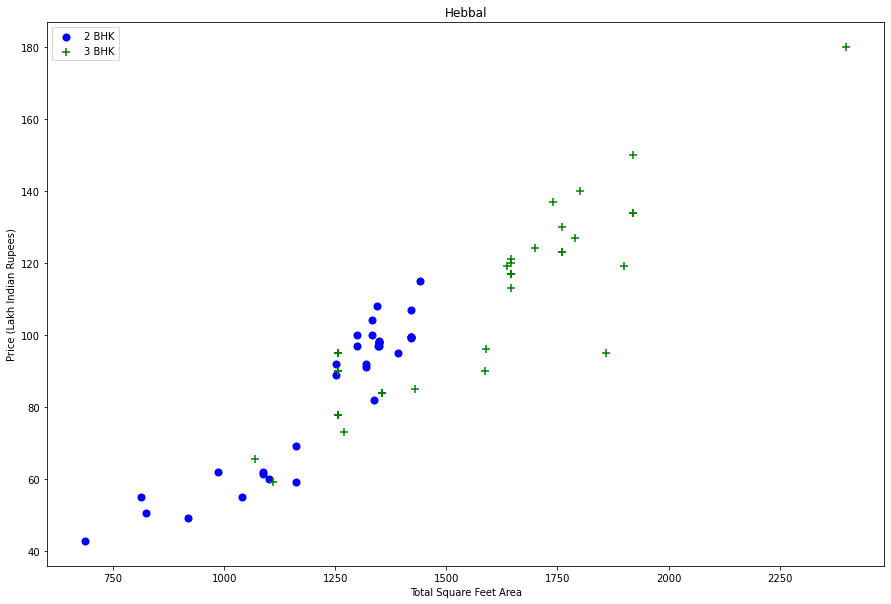

In [126]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Hebbal")

In [127]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
# df8 = df7.copy()
data.shape

(6106, 8)

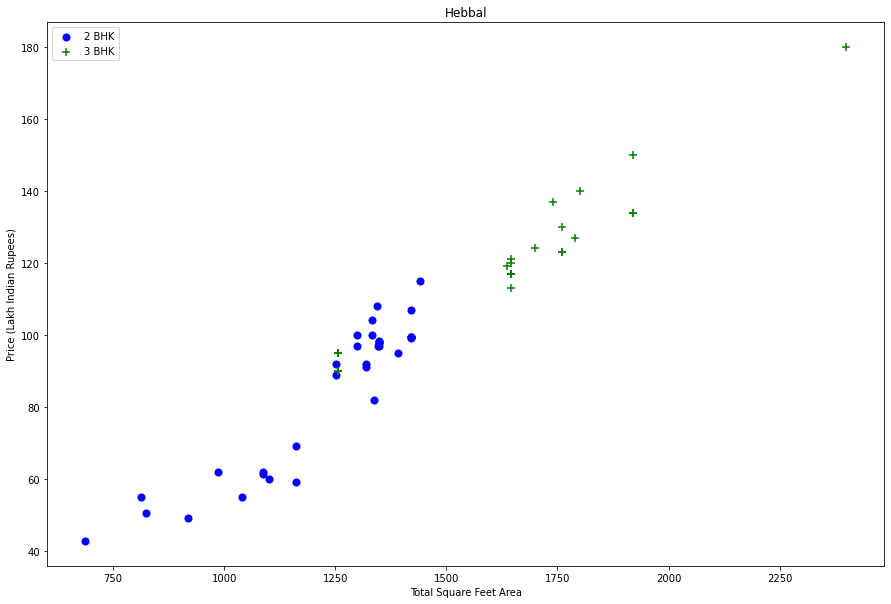

In [128]:
plot_scatter_chart(data,"Hebbal")

**We will now remove the non useful features**

In [129]:
data.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [130]:
data = data.drop(['size', 'price_per_sqft'], axis='columns')
data.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


### Use One Hot Encoding For Location

---
One-hot encoding is a technique used to convert categorical variables into a binary representation that can be used for machine learning algorithms. It creates new binary columns, also known as dummy variables, where each column represents a unique category in the original categorical variable.

**Creating dummies for location**

In [131]:
dummies = pd.get_dummies(data.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating dummies for area type**

In [133]:
dummies = pd.get_dummies(data.area_type)
data = pd.concat([data,dummies.drop('Carpet  Area',axis='columns')],axis='columns')
data.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
## dropping location and area_type column as we already have a dummy for them
data = data.drop(['location', 'area_type'], axis='columns')
data.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


---
## Model Building

In [135]:
X = data.drop('price', axis = 1)
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [136]:
Y = data['price']

#### Train test split

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [138]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8617597454863012

###### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.88516805, 0.87488811, 0.87015647, 0.87166533, 0.87283139])

###### Testing other algorithms

In [140]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.874942,{'normalize': False}
1,lasso,0.652898,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.778464,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## Exporting the model

In [141]:

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

###### Export location and column information to a file that will be useful later on in our prediction application

In [142]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))